In [3]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from IPython.display import display     
import os
import warnings
warnings.filterwarnings("ignore")

In [4]:
# importing the file needed for the analysis
df = pd.read_csv("../data/processed/df_cleaned.csv")

In [5]:
df.head()

,year,rank,country,score,gdp_per_capita,social_support,life_expectancy,freedom,generosity,corruption
0,2019,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2019,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,2019,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,2019,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,2019,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


## 1. Table - Summary Statistics

In [6]:
# yearby stats
result_wide = df.groupby('year').agg({'score' : ['max', 'min', np.mean, np.std, np.median],
                                    'gdp_per_capita' : ['max', 'min', np.mean, np.std, np.median],
                                    'social_support' : ['max', 'min', np.mean, np.std, np.median],
                                    'life_expectancy' : ['max', 'min', np.mean, np.std, np.median],
                                    'freedom' : ['max', 'min', np.mean, np.std, np.median],
                                    'generosity': ['max', 'min', np.mean, np.std, np.median],
                                    'corruption': ['max', 'min', np.mean, np.std, np.median]
                                    })
result_wide.T

year                        2015      2016      2017      2018      2019
score           max     7.587000  7.526000  7.537000  7.632000  7.769000
                min     2.839000  2.905000  2.905000  2.905000  3.203000
                mean    5.420566  5.412952  5.423731  5.454897  5.498103
                std     1.157789  1.148572  1.112397  1.099936  1.085435
                median  5.360000  5.401000  5.336000  5.483000  5.523000
gdp_per_capita  max     1.690420  1.824270  1.870766  2.096000  1.684000
                min     0.000000  0.056610  0.091623  0.069000  0.046000
                mean    0.871926  0.975114  1.013801  0.919586  0.939028
                std     0.395897  0.407680  0.408186  0.382178  0.382134
                median  0.939290  1.052660  1.081166  0.982000  1.004000
social_support  max     1.402230  1.183260  1.610574  1.644000  1.624000
                min     0.139950  0.000000  0.396103  0.372000  0.378000
                mean    1.003036  0.804485  1.208205  1.233159  1.232172
                std     0.268007  0.267225  0.270640  0.287096  0.280006
                median  1.043560  0.863330  1.262791  1.290000  1.303000
life_expectancy max     1.025250  0.952770  0.949492  1.030000  1.141000
                min     0.000000  0.000000  0.005565  0.000000  0.192000
                mean    0.654586  0.573621  0.574347  0.621241  0.752503
                std     0.232407  0.224003  0.221547  0.234569  0.220631
                median  0.709500  0.619040  0.617585  0.669000  0.805000
freedom         max     0.669730  0.608480  0.658249  0.724000  0.631000
                min     0.000000  0.043200  0.030370  0.025000  0.000000
                mean    0.432742  0.373400  0.414218  0.460069  0.396303
                std     0.148190  0.139874  0.143601  0.154441  0.141211
                median  0.436260  0.397470  0.440306  0.493000  0.426000
generosity      max     0.795880  0.819710  0.838075  0.598000  0.566000
                min     0.000000  0.000000  0.000000  0.000000  0.000000
                mean    0.237805  0.242718  0.248813  0.181966  0.184228
                std     0.128528  0.135006  0.137522  0.100675  0.096704
                median  0.217470  0.222450  0.231503  0.172000  0.176000
corruption      max     0.551910  0.505210  0.464308  0.457000  0.453000
                min     0.000000  0.000000  0.000000  0.000000  0.000000
                mean    0.140770  0.135668  0.123585  0.112097  0.110297
                std     0.120773  0.112380  0.103716  0.098362  0.096328
                median  0.105010  0.103390  0.088174  0.081500  0.085000

## 2.1 Histogram - Score - Yearwise

In [7]:
fig = make_subplots(rows=3, cols=2, subplot_titles=("2015", "2016", "2017", "2018", "2019"))

fig.add_trace(
    go.Histogram(x=df[df['year'] == 2015]['score'], marker_color="skyblue"),
    row=1, col=1
)
fig.add_trace(
    go.Histogram(x=df[df['year'] == 2016]['score'], marker_color="olive"),
    row=1, col=2
)
fig.add_trace(
    go.Histogram(x=df[df['year'] == 2017]['score'], marker_color="gold"),
    row=2, col=1
)
fig.add_trace(
    go.Histogram(x=df[df['year'] == 2018]['score'], marker_color="teal"),
    row=2, col=2
)
fig.add_trace(
    go.Histogram(x=df[df['year'] == 2019]['score'], marker_color="orange"),
    row=3, col=1
)

fig.update_layout(
    height=800,
    width=800,
    title="Histograms of Happiness Score by Year",
    xaxis=dict(title="Happiness Score"),
    yaxis=dict(title="Country Frequency"),
    showlegend=False,
    template="plotly_white"
)

fig.show()

## 2.2 Histogram(with 3 bins) - Score - Yearwise

In [8]:
fig = make_subplots(rows=3, cols=2, subplot_titles=("2015", "2016", "2017", "2018", "2019"))

num_bins = 3

fig.add_trace(
    go.Histogram(x=df[df['year'] == 2015]['score'], marker_color="skyblue", nbinsx=num_bins),
    row=1, col=1
)
fig.add_trace(
    go.Histogram(x=df[df['year'] == 2016]['score'], marker_color="olive", nbinsx=num_bins),
    row=1, col=2
)
fig.add_trace(
    go.Histogram(x=df[df['year'] == 2017]['score'], marker_color="gold", nbinsx=num_bins),
    row=2, col=1
)
fig.add_trace(
    go.Histogram(x=df[df['year'] == 2018]['score'], marker_color="teal", nbinsx=num_bins),
    row=2, col=2
)
fig.add_trace(
    go.Histogram(x=df[df['year'] == 2019]['score'], marker_color="orange", nbinsx=num_bins),
    row=3, col=1
)

fig.update_layout(
    height=800,
    width=800,
    title="Histograms of Happiness Score by Year",
    xaxis=dict(title="Happiness Score"),
    yaxis=dict(title="Country Frequency"),
    showlegend=False,
    template="plotly_white"
)

fig.show()

## 2.3 KDE Plot - Score - Yearwise

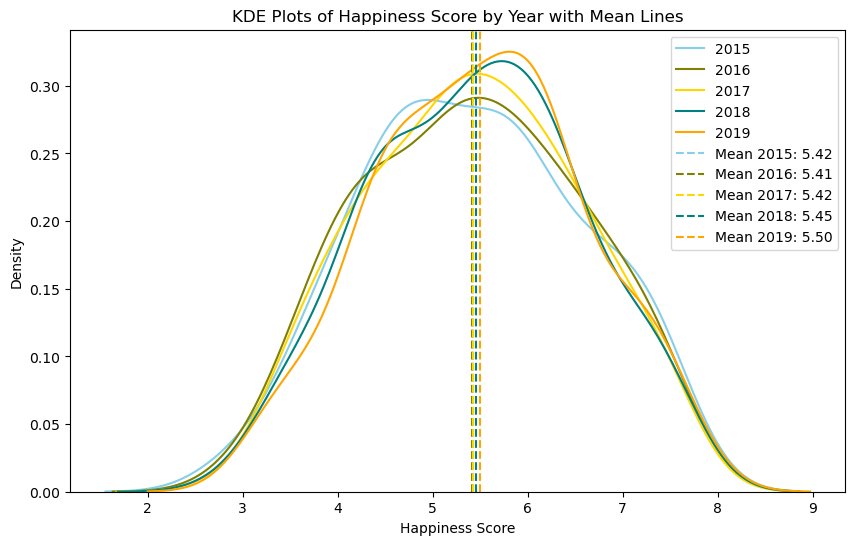

In [9]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.kdeplot(data=df[df['year'] == 2015], x="score", color="skyblue", label="2015")
sns.kdeplot(data=df[df['year'] == 2016], x="score", color="olive", label="2016")
sns.kdeplot(data=df[df['year'] == 2017], x="score", color="gold", label="2017")
sns.kdeplot(data=df[df['year'] == 2018], x="score", color="teal", label="2018")
sns.kdeplot(data=df[df['year'] == 2019], x="score", color="orange", label="2019")

years = [2015, 2016, 2017, 2018, 2019]
colors = ["skyblue", "olive", "gold", "teal", "orange"]
for count, year in enumerate(years):
    mean_score = df[df['year'] == year]['score'].mean()
    ax.axvline(x=mean_score, color=colors[count], linestyle='dashed', label=f"Mean {year}: {mean_score:.2f}")

ax.set_xlabel("Happiness Score")
ax.set_ylabel("Density")
ax.set_title("KDE Plots of Happiness Score by Year with Mean Lines")
ax.legend()
plt.show()

## 3. Box Plot - Score - Yearwise

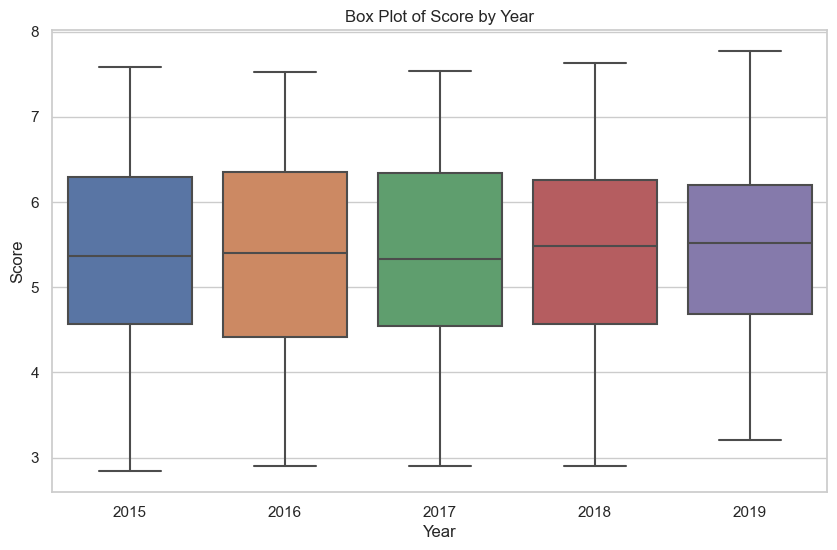

In [10]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.boxplot(x='year', y='score', data=df)
plt.title('Box Plot of Score by Year')
plt.xlabel('Year')
plt.ylabel('Score')
plt.show()

## 4. Line Plot

In [11]:
def lineplot(factor):
    summary_df = df.groupby('year')[factor].agg(['max', 'min', 'mean']).reset_index()

    summary_df_melted = summary_df.melt(id_vars='year', var_name='Metrics', value_name=factor)

    fig = px.line(summary_df_melted, x='year', y=factor, color='Metrics', markers=True,
                labels={'year': 'Year', factor: factor})

    return fig

# List of factors to plot
factors_to_plot = ['score', 'gdp_per_capita', 'social_support', 'life_expectancy', 'freedom', 'generosity', 'corruption']

# Define relative heights for the rows (adjust as needed)
heights = [0.3, 0.3, 0.2, 0.2]

# Create subplots with appropriate-sized graphs
fig = make_subplots(rows=4, cols=2, shared_yaxes=False,
                    subplot_titles=[f'{factor.capitalize()}' for factor in factors_to_plot],
                    horizontal_spacing=0.15, vertical_spacing=0.2,
                    row_heights=heights)

for i, factor in enumerate(factors_to_plot, 1):
    line_plot = lineplot(factor)
    for trace in line_plot.data:
        fig.add_trace(go.Scatter(trace), row=(i-1)//2 + 1, col=(i-1)%2 + 1)
    fig.update_xaxes(title_text="Year", row=(i-1)//2 + 1, col=(i-1)%2 + 1)
    fig.update_yaxes(title_text=factor, row=(i-1)//2 + 1, col=(i-1)%2 + 1)

# Update subplot settings for better appearance
fig.update_layout(title_text="Line Plots of Factors Year-wise", showlegend=False,
                width=1000, height=1200, font=dict(size=12))
fig.show()

## 5.1 Table - Top 10 Countries

In [12]:
top_rank = df[df['rank']<=10].sort_values(['year', 'rank'])
top_rank = top_rank[['year', 'rank', 'country']]
pivoted_df_top = top_rank.pivot(index='rank', columns='year', values='country').sort_index()
pivoted_df_top

year,2015,2016,2017,2018,2019
rank,,,,,
1,Switzerland,Denmark,Norway,Finland,Finland
2,Iceland,Switzerland,Denmark,Norway,Denmark
3,Denmark,Iceland,Iceland,Denmark,Norway
4,Norway,Norway,Switzerland,Iceland,Iceland
5,Canada,Finland,Finland,Switzerland,Netherlands
6,Finland,Canada,Netherlands,Netherlands,Switzerland
7,Netherlands,Netherlands,Canada,Canada,Sweden
8,Sweden,New Zealand,New Zealand,New Zealand,New Zealand
9,New Zealand,Australia,Sweden,Sweden,Canada


## 5.2 Table - Bottom 10 Countries

In [13]:
df_sorted = df[['year', 'rank', 'country']].sort_values(['year', 'rank'])
subset_tail_df = df_sorted.groupby('year').tail(10)
subset_tail_df = subset_tail_df[['year', 'country']].reset_index(drop=True)
subset_tail_df['rank'] = subset_tail_df.groupby(['year']).cumcount() + 1
pivoted_df_bottom = subset_tail_df.pivot(index='rank', columns='year', values='country').sort_index()
pivoted_df_bottom

year,2015,2016,2017,2018,2019
rank,,,,,
1,Chad,Madagascar,Madagascar,Afghanistan,Burundi
2,Guinea,Tanzania,Haiti,Botswana,Zimbabwe
3,Ivory Coast,Liberia,Yemen,Malawi,Haiti
4,Burkina Faso,Guinea,Liberia,Haiti,Botswana
5,Afghanistan,Rwanda,Guinea,Liberia,Syria
6,Rwanda,Benin,Togo,Syria,Malawi
7,Benin,Afghanistan,Rwanda,Rwanda,Yemen
8,Syria,Togo,Syria,Yemen,Rwanda
9,Burundi,Syria,Tanzania,Tanzania,Tanzania


## 6.1 Heatmap - Overall

In [14]:
heatmap_data = df[['score', 'gdp_per_capita', 'social_support', 'life_expectancy', 'freedom', 'generosity', 'corruption']]
df_corr = heatmap_data.corr().round(1)  
mask = np.zeros_like(df_corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
df_corr_viz = df_corr.mask(mask).dropna(how='all').dropna('columns', how='all')
fig = px.imshow(df_corr_viz, text_auto=True)

fig.update_layout(
    height=800,
    width=800,
    title="Correlation between factors",
    showlegend=True,
    template="plotly_white"
)

fig.show()

## 6.2 Heatmap - YearWise

In [15]:
fig = make_subplots(rows=3, cols=2, subplot_titles=[str(year) for year in df['year'].unique()])

for i, year in enumerate(df['year'].unique()):
    heatmap_data = df[df['year'] == year][['score', 'gdp_per_capita', 'social_support', 'life_expectancy', 'freedom', 'generosity', 'corruption']]
    df_corr = heatmap_data.corr().round(1)
    mask = np.zeros_like(df_corr, dtype=bool)
    mask[np.triu_indices_from(mask)] = True
    df_corr_viz = df_corr.mask(mask).dropna(how='all').dropna('columns', how='all')

    fig.add_trace(
        go.Heatmap(z=df_corr_viz.values,
                x=df_corr_viz.columns,
                y=df_corr_viz.index,
                zmin=-1,
                zmax=1,
                colorscale='RdBu',
                colorbar=dict(len=0.2, y=0.85)),
        row=(i // 2) + 1,
        col=(i % 2) + 1
    )

fig.update_layout(
    height=1000,
    width=1000,
    title="Correlation between factors for each year",
    showlegend=False,
    template="plotly_white"
)

fig.show()

## 7. Parallel Coordinates Plot - Year 2019

In [16]:
df_2019 = df[df['year']==2019]
# Let's reverse the min and max values for the Rank, so that the country with top rank comes on the top. 
dimensions = list([ dict(range=(df_2019['rank'].max(), df_2019['rank'].min()), tickvals = df_2019['rank'], ticktext = df_2019['country'],label='country', values=df_2019['rank']),
                    dict(range=(df_2019['score'].min(),df_2019['score'].max()),label='score', values=df_2019['score']),
                    dict(range=(df_2019['gdp_per_capita'].min(),df_2019['gdp_per_capita'].max()),label='gdp_per_capita', values=df_2019['gdp_per_capita']),
                    dict(range=(df_2019['social_support'].min(), df_2019['social_support'].max()),label='social_support', values=df_2019['social_support']),
                    dict(range=(df_2019['life_expectancy'].min(), df_2019['life_expectancy'].max()), label='life_expectancy', values=df_2019['life_expectancy']),
                    dict(range=(df_2019['freedom'].min(), df_2019['freedom'].max()),label='freedom', values=df_2019['freedom']),
                    dict(range=(df_2019['generosity'].min(), df_2019['generosity'].max()),label='generosity', values=df_2019['generosity']),
                    dict(range=(df_2019['corruption'].min(), df_2019['corruption'].max()),label='corruption', values=df_2019['corruption']),
                ])
fig = go.Figure(data= go.Parcoords(line = dict(color = df_2019['rank'], colorscale = 'agsunset'), dimensions = dimensions))
fig.update_layout(width=1200, height=1300,margin=dict(l=150, r=60, t=60, b=40))
fig.show()

## 8.1 Grouped Bar Chart - Top 10 VS Bottom 10 - Yearwise - Mean

In [17]:
# top 10 countries dataframe subsetting
top_ten = df[df['rank']<=10].sort_values(['year', 'rank']).reset_index(drop=True)
top_ten['category'] = 'top_ten'

# bottom 10 countries datafram subsetting
df_sorted = df.sort_values(['year', 'rank'])
subset_tail_df = df_sorted.groupby('year').tail(10)
subset_tail_df = subset_tail_df.reset_index(drop=True)
subset_tail_df['rank'] = subset_tail_df.groupby(['year']).cumcount() + 1
subset_tail_df['category'] = 'bottom_ten'

# union all dataframes
top_bot = pd.concat([top_ten, subset_tail_df])
top_bot

# grouping by
top_bot_mean = top_bot.groupby(['year', 'category']).agg(score_mean=('score', np.mean),
                                                        gdp_per_capita=('gdp_per_capita', np.mean),
                                                        social_support=('social_support', np.mean),
                                                        life_expectancy=('life_expectancy', np.mean),
                                                        freedom=('freedom', np.mean),
                                                        generosity=('generosity', np.mean),
                                                        corruption=('corruption', np.mean)).reset_index()

# chart
def plot_mean_values(data, x_variable, y_variable, title):
    fig = go.Figure()

    x_values = data[x_variable].unique()

    for category in data['category'].unique():
        category_data = data[data['category'] == category]
        fig.add_trace(go.Bar(
            x=x_values,
            y=category_data[y_variable],
            name=category
        ))

    fig.update_layout(
        title=title,
        xaxis=dict(tickmode='linear', tick0=min(x_values), dtick=1),
        yaxis=dict(title=y_variable.capitalize()),
        barmode='group',
        width=800,
        height=500,
        margin=dict(l=50, r=50, b=100, t=100)
    )

    fig.show()

plot_mean_values(top_bot_mean, 'year', 'score_mean', 'Mean Happiness Score by Year and Category')

In [18]:
plot_mean_values(top_bot_mean, 'year', 'gdp_per_capita', 'Mean gdp_per_capita by Year and Category')

In [19]:
plot_mean_values(top_bot_mean, 'year', 'social_support', 'Mean social_support by Year and Category')

In [20]:
plot_mean_values(top_bot_mean, 'year', 'life_expectancy', 'Mean life_expectancy by Year and Category')

In [21]:
plot_mean_values(top_bot_mean, 'year', 'freedom', 'Mean freedom by Year and Category')

In [22]:
plot_mean_values(top_bot_mean, 'year', 'generosity', 'Mean generosity by Year and Category')

In [23]:
plot_mean_values(top_bot_mean, 'year', 'corruption', 'Mean corruption by Year and Category')

## 8.2 Grouped Bar Chart - Yearwise - All Factors

In [24]:
df_agg = df.groupby(['year']).agg(gdp_per_capita=('gdp_per_capita', np.mean),
                                social_support=('social_support', np.mean),
                                life_expectancy=('life_expectancy', np.mean),
                                freedom=('freedom', np.mean),
                                generosity=('generosity', np.mean),
                                corruption=('corruption', np.mean)).reset_index()

df_agg_T = df_agg.set_index('year').T.reset_index()
df_agg_T

fig = go.Figure()

for year in df_agg_T.columns[1:]:
    fig.add_trace(go.Bar(
        x=df_agg_T['index'],
        y=df_agg_T[year],
        name=str(year),
    ))

# Update layout
fig.update_layout(
    title="Grouped Bar Chart - Factors by Year",
    xaxis_title="Factors",
    yaxis_title="Average Value",
    barmode="group",
    legend_title="Year",
    height=600
)

# Show the plot
fig.show()